<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/TreeXOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

First, can the decision tree algorithm (at least the sklearn version) learn the XOR?

In [0]:
X = np.random.uniform(-1,1,(10000,2))
y = np.sign(X[:,0]) * np.sign(X[:,1])

In [40]:
X.shape

(10000, 2)

In [0]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
dt.score(X_te, y_te)

1.0

Yep, it did just fine.  See below though, that it didn't find the splits quite so nicely as it could have.  (Some algorithms will postprocess to reduce redundant combinations of rules, so perhaps that could work here.)

[Text(132.525, 195.696, 'X[1] <= -0.195\ngini = 0.5\nsamples = 9000\nvalue = [4523, 4477]'),
 Text(55.800000000000004, 152.208, 'X[0] <= 0.0\ngini = 0.499\nsamples = 3629\nvalue = [1889, 1740]'),
 Text(27.900000000000002, 108.72, 'gini = 0.0\nsamples = 1740\nvalue = [0, 1740]'),
 Text(83.7, 108.72, 'gini = 0.0\nsamples = 1889\nvalue = [1889, 0]'),
 Text(209.25000000000003, 152.208, 'X[0] <= 0.001\ngini = 0.5\nsamples = 5371\nvalue = [2634, 2737]'),
 Text(139.5, 108.72, 'X[1] <= 0.0\ngini = 0.29\nsamples = 2667\nvalue = [2198, 469]'),
 Text(83.7, 65.232, 'X[0] <= -0.0\ngini = 0.004\nsamples = 469\nvalue = [1, 468]'),
 Text(55.800000000000004, 21.744, 'gini = 0.0\nsamples = 468\nvalue = [0, 468]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(195.3, 65.232, 'X[0] <= -0.0\ngini = 0.001\nsamples = 2198\nvalue = [2197, 1]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 2197\nvalue = [2197, 0]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 1

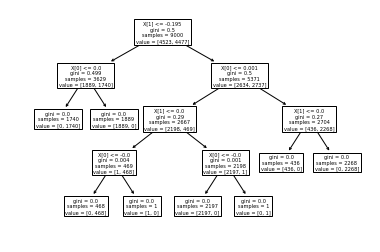

In [44]:
plot_tree(dt)

Next, add some noisy features:

In [38]:
X = np.random.uniform(-1,1,(10000,10))
y = np.sign(X[:,0]) * np.sign(X[:,1])
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
dt = DecisionTreeClassifier()
dt.fit(X_tr, y_tr)
dt.score(X_te, y_te)

0.854

Took a pretty serious hit.  (I assume) the tree would sometimes rather split on noise instead of finding the XOR.

Now add some useful features in addition to the XOR part.

The answers here are quite a bit closer, so I've put them together in a cell to rerun a few times.
It looks like the XOR does cause a little bit of a problem, but not much.

In [115]:
X = np.random.uniform(-1,1,(10000,10))

y = (np.sum(np.sign(X), axis=1) <= 0)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
dt = DecisionTreeClassifier()
dt.fit(X_tr, y_tr)
print('Without XOR:', dt.score(X_te, y_te))

y = (np.sign( np.sign(X[:,0]) * np.sign(X[:,1]) + np.sum(np.sign(X[:, 2:10]), axis=1) ) <= 0)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
dt = DecisionTreeClassifier()
dt.fit(X_tr, y_tr)
print('With XOR', dt.score(X_te, y_te))

Without XOR: 0.864
With XOR 0.838


Finally do some feature engineering to get the XOR directly (just to see that the tree really can learn the basic model).

In [118]:
X_eng = np.hstack( (np.sign(X[:,0]) * np.sign(X[:,1]).reshape(-1,1) , X[:, 2:10]) )
y = np.sign( np.sum(np.sign(X_eng), axis=1) )
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
dt = DecisionTreeClassifier()
dt.fit(X_tr, y_tr)
dt.score(X_te, y_te)

1.0